In [1]:
import warnings
warnings.filterwarnings('ignore')
from dascore.utils.downloader import fetch

import numpy as np
from scipy import signal
from scipy.fft import fft,fftfreq
from scipy.signal import find_peaks

from matplotlib import ticker
import matplotlib.pyplot as plt

import dascore as dc

import os
%matplotlib inline


In [2]:
# Get a path to an example file, replace with your path

folder_path = '../GPR_20230912/2/inline/Iron/UTC-YMD20230912-HMS205332.889'
filename = 'GPR_25khz_strain_rate_UTC-YMD20230912-HMS205332.889_seq_00000000000.hdf5'
full_path = os.path.join(folder_path,filename)

# Read data
file1 = fetch(full_path)
pa1 = dc.read(file1)

# Get sampling rate (s)
df = 1/ (pa1[0].attrs['d_time'].astype('float')*1e-9) 

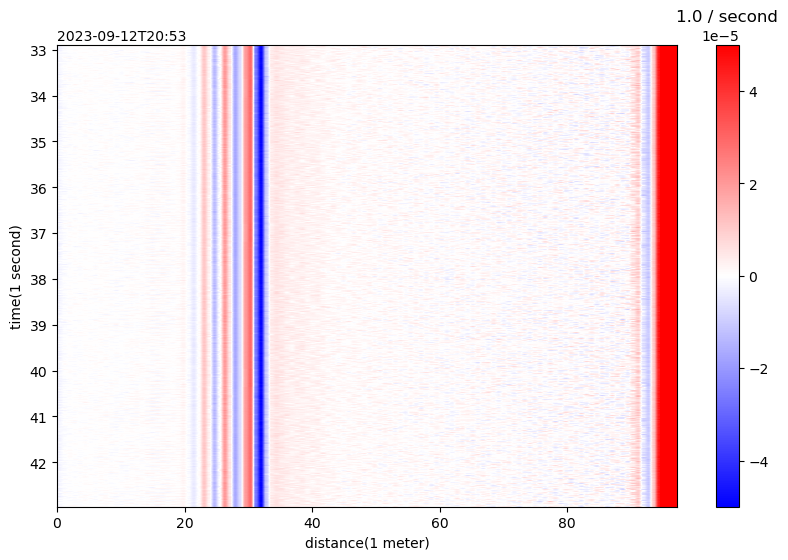

In [3]:
fig, ax = plt.subplots(1, 1,figsize=(10, 6))

pa1[0].viz.waterfall(ax=ax,show=False, scale=(-5e-5,5e-5));

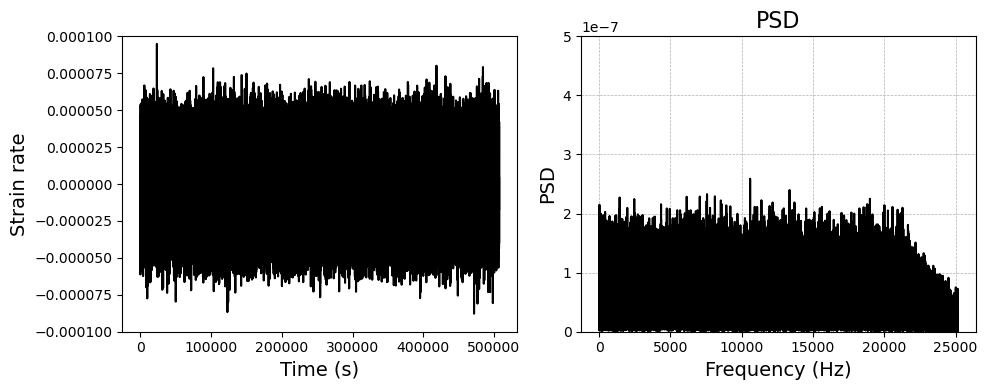

In [4]:
#Channel index
ch = 31

# Spectrum using Welch method
f_1, spec_1 = signal.welch(pa1[0].data[:,ch], df, 'flattop',1024*5000, scaling='spectrum')

peaks, _ = find_peaks(np.sqrt(spec_1), height=9.0e-7)

# Plot results
fig, ax = plt.subplots(1,2, figsize=(10,4))


ax[0].plot(pa1[0].data[:,ch],'k')
ax[0].set_ylim(-0.0001,0.0001)
# ax[0].set_xlim(1.005e5,1.008e5)
ax[0].set_xlabel('Time (s)',fontsize=14)
ax[0].set_ylabel('Strain rate',fontsize=14)

ax[1].plot(f_1, np.sqrt(spec_1),'k')
ax[1].set_title('PSD',fontsize=16)
ax[1].set_ylim(0,5e-7)
ax[1].grid(linestyle='dashed',linewidth=0.5)
ax[1].set_xlabel('Frequency (Hz)',fontsize=14)
ax[1].set_ylabel('PSD',fontsize=14)
plt.tight_layout()

# plt.savefig('Waveform_100Hz.png',dpi=300)
plt.show()